In [1]:
import os 
os.chdir("../../")

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

from src.preprocess import apply_ordinal_mapping, one_hot_encode

In [4]:
sns.set(style="whitegrid")

In [5]:
DATA_PATH = os.path.join(os.getcwd(), "data", "heart.csv")

In [6]:
TARGET_COL = "HeartDisease"

In [7]:
df = pd.read_csv(DATA_PATH)

# Clean the dataset

### Impute missing/invalid values

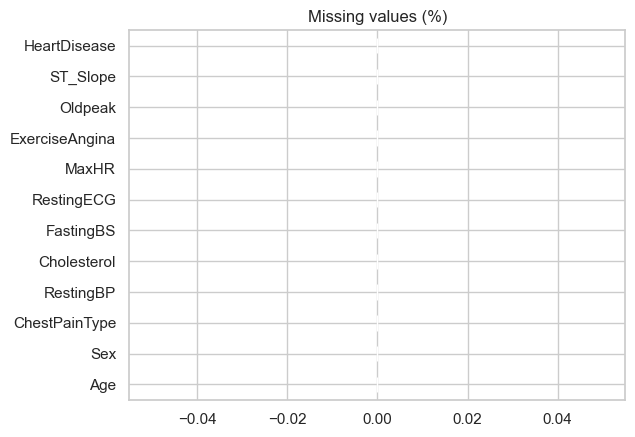

In [8]:
missing_values = df.isna().sum()
missing_values /= df.shape[0]
missing_values *= 100
missing_values.sort_values(ascending=True).plot(kind="barh")
plt.title("Missing values (%)")
plt.show()

No NaNs.

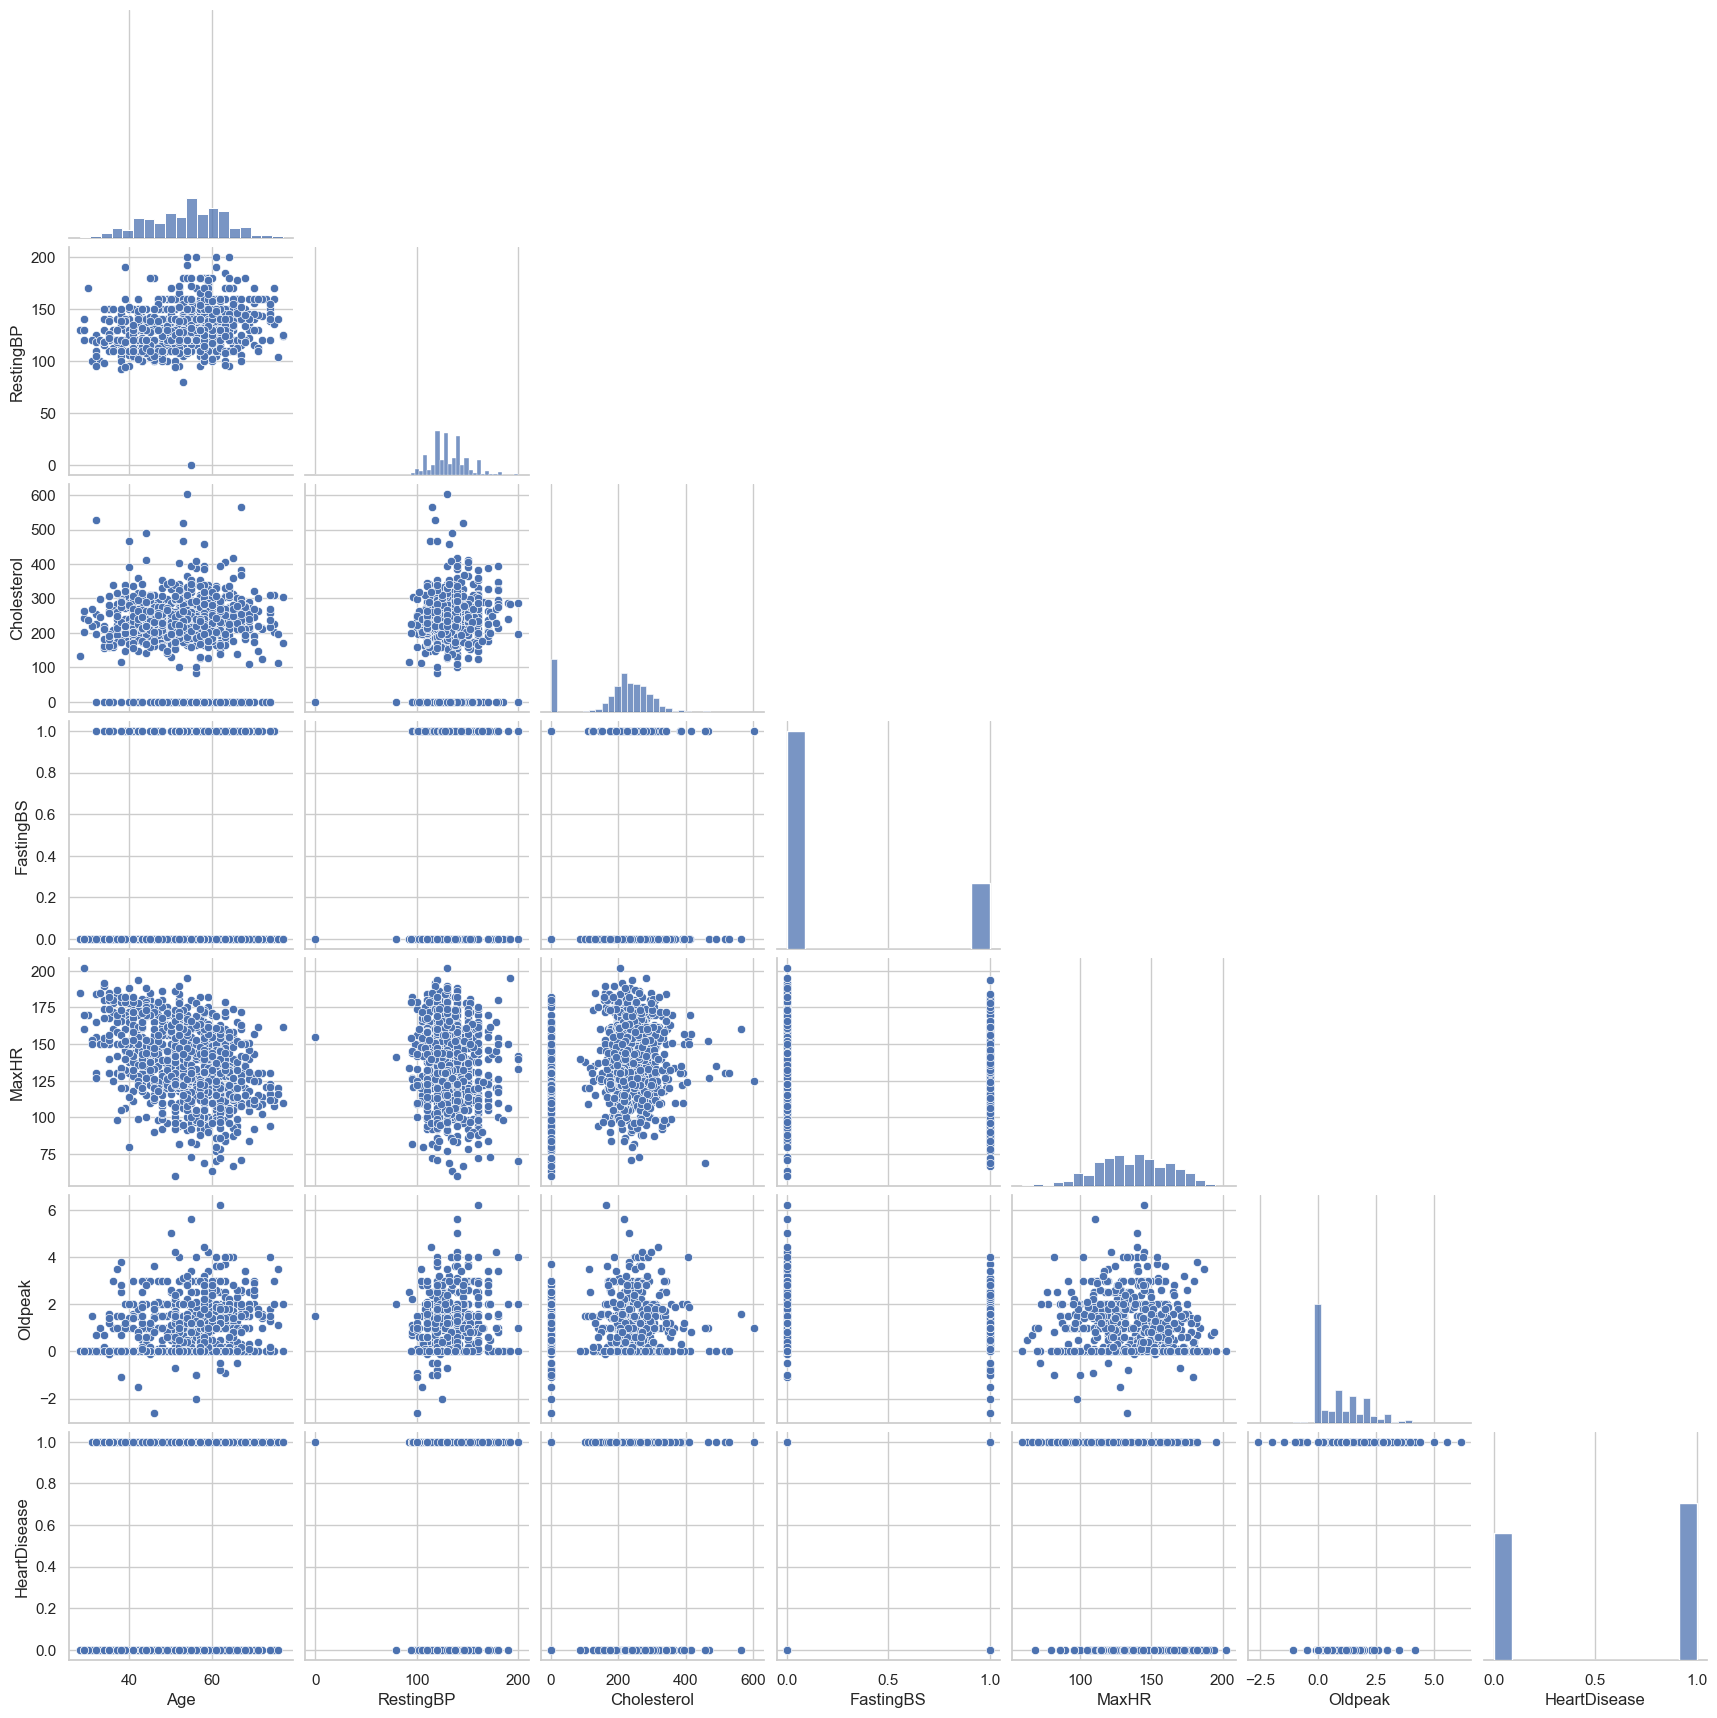

In [9]:
sns.pairplot(data=df, corner=True)
plt.show()

However, it looks like Cholesterol and Oldpeak have zeroed values that we have to deal with.

### Feature encoding
```
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]
```

In [10]:
df = one_hot_encode(data=df, colname="Sex", drop_first=True)

In [11]:
df = one_hot_encode(data=df, colname="ChestPainType", drop_first=False)

In [12]:
df = one_hot_encode(data=df, colname="RestingECG", drop_first=True)

In [13]:
df = apply_ordinal_mapping(data=df, colname="ExerciseAngina", mapping={"N": 0, "Y": 1})

In [14]:
df = apply_ordinal_mapping(data=df, colname="ST_Slope", mapping={"Down": -1, "Flat": 0, "Up": 1})

These feature preprocessing steps will be used in the `src/preprocessing.py` Preprocessor class.

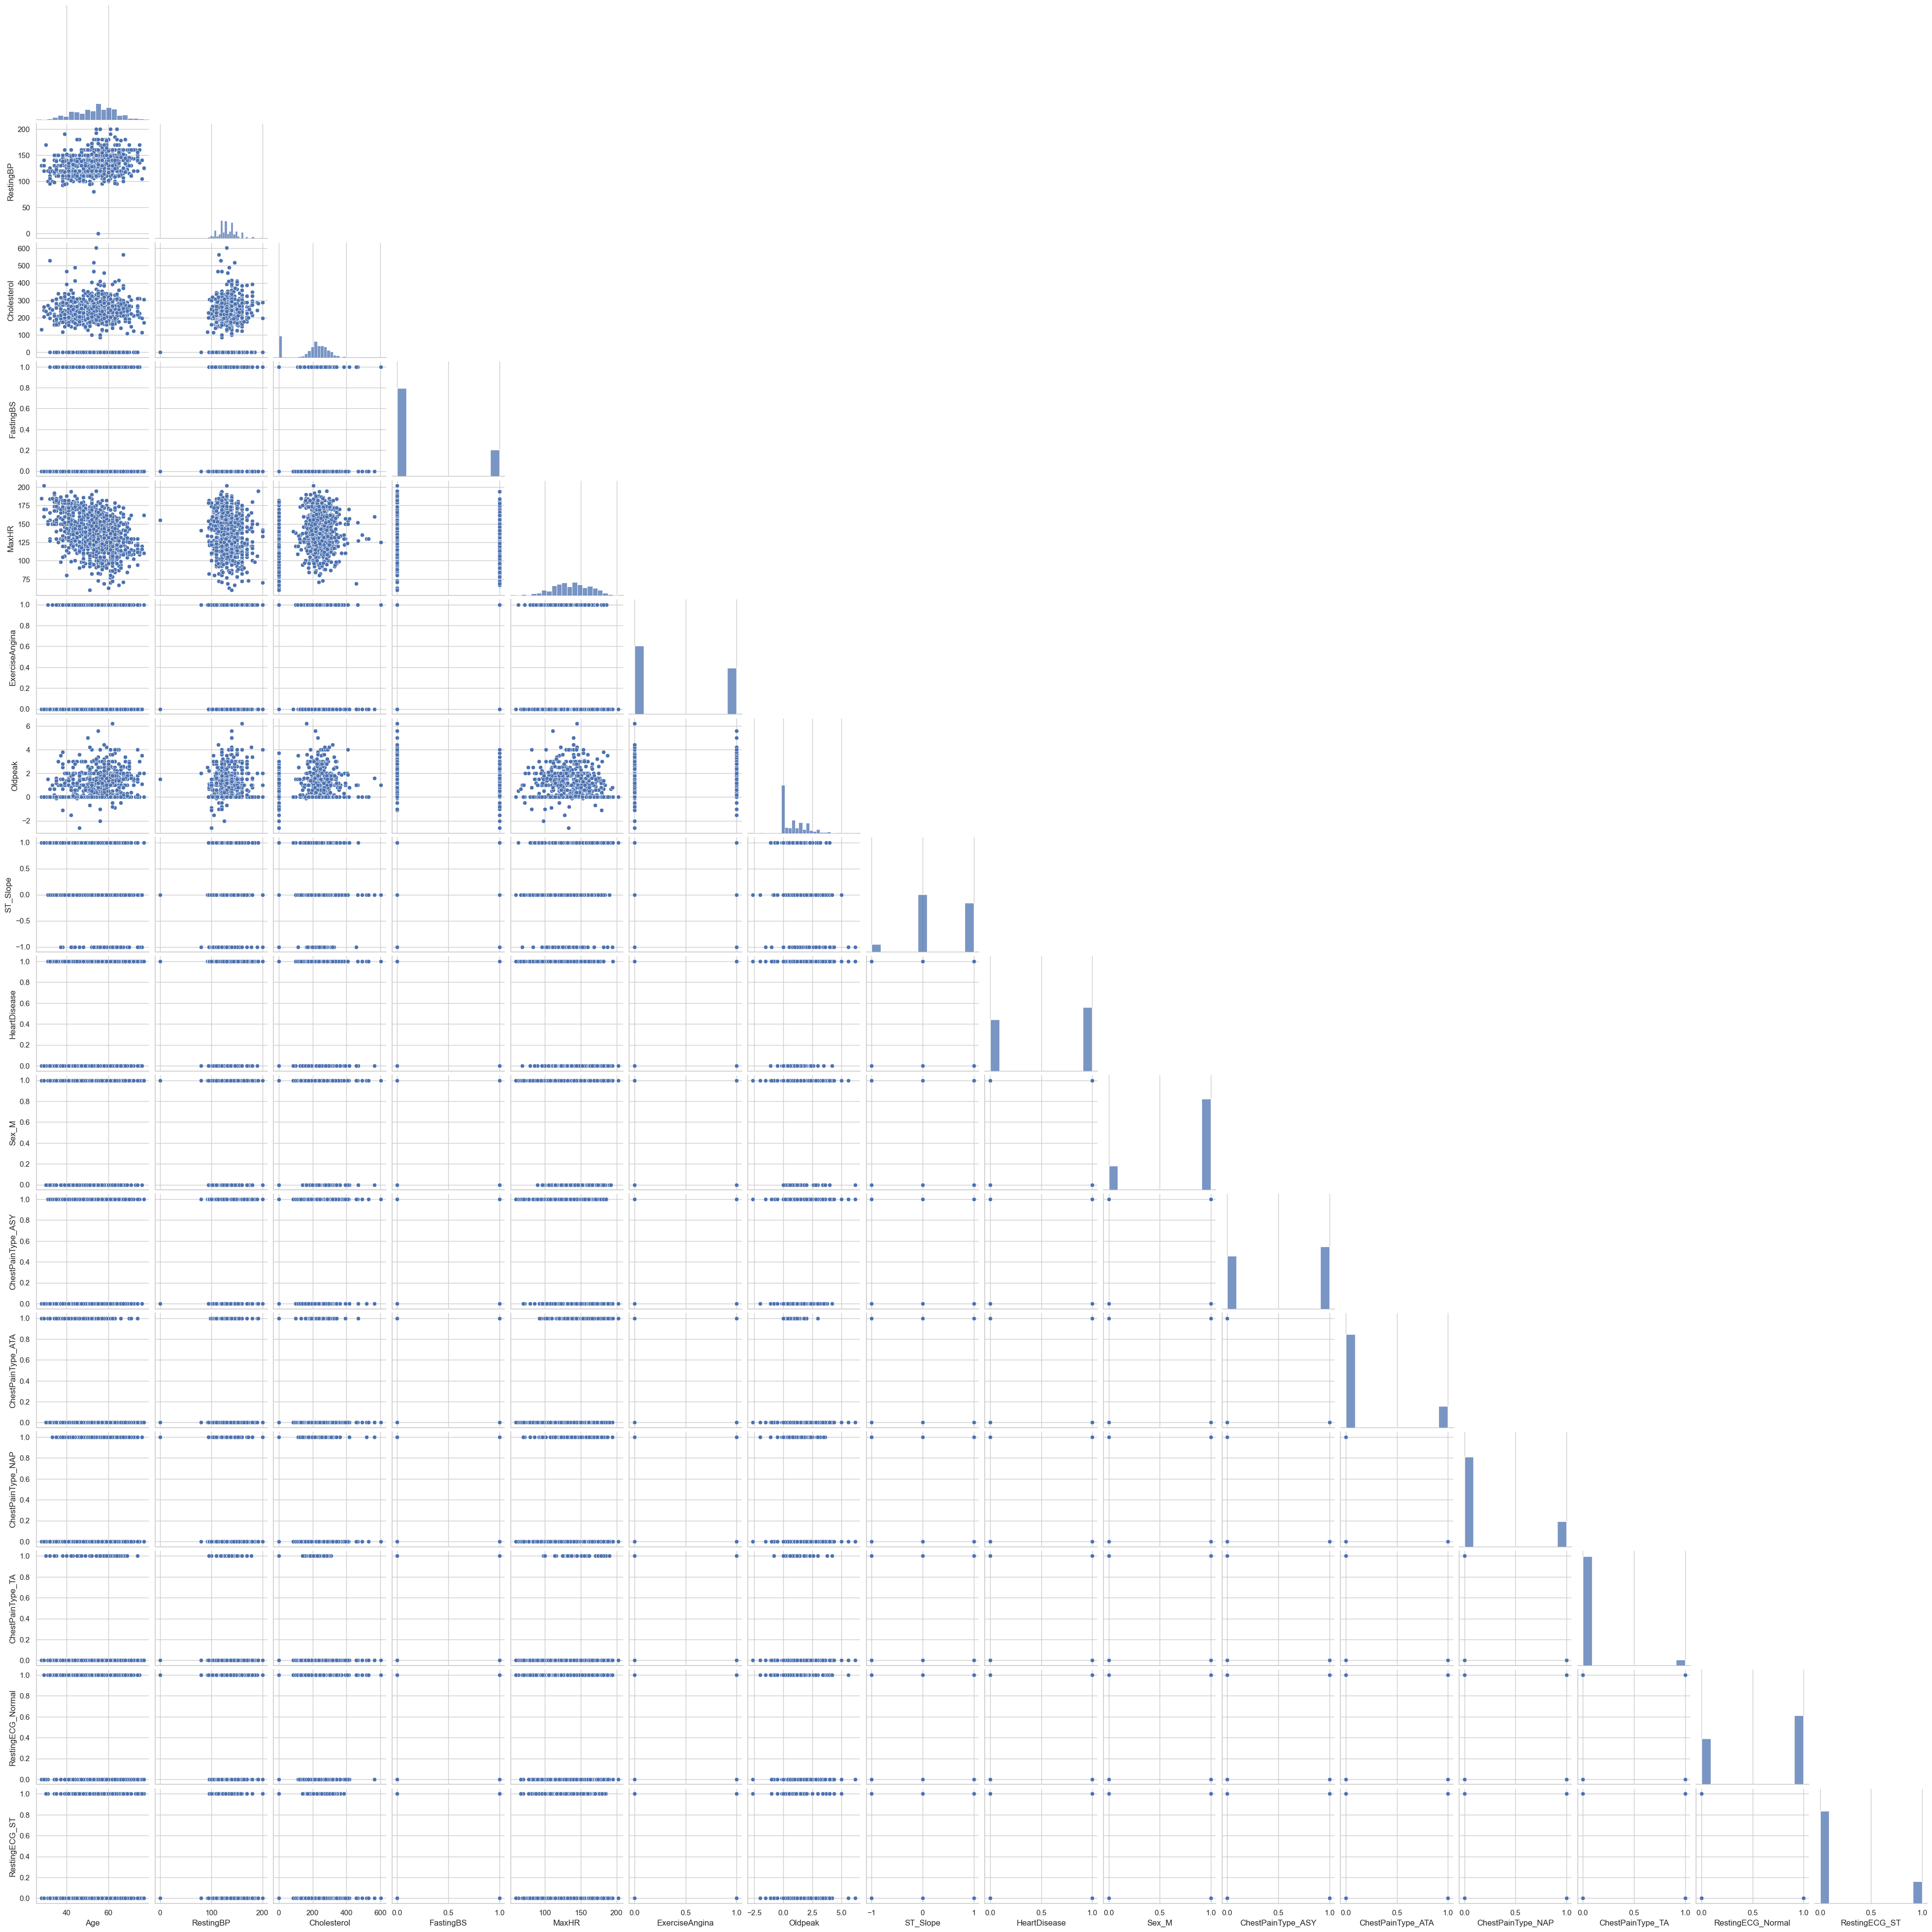

In [15]:
sns.pairplot(data=df, corner=True)
plt.show()

---